### Exploring and evaluating models

#### Import libreries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.datasets import make_imbalance
from imblearn.metrics import classification_report_imbalanced
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from collections import Counter

from sklearn.metrics import classification_report,confusion_matrix

#### Load Dataset

In [2]:
df=pd.read_csv("Dataset.csv")
df.head(5)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,0,1,0
2,298.1,308.5,1498,49.4,5,0,0,1,0
3,298.2,308.6,1433,39.5,7,0,0,1,0
4,298.2,308.7,1408,40.0,9,0,0,1,0


#### Over-Under Resampling

In [3]:
# Separate features (X) and the target variable (y)
X = df.drop('Machine failure', axis=1)  # Drop the 'Machine failure' column from the features
y = df['Machine failure']  # Define the target variable 'Machine failure'

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train_before, X_test, y_train_before, y_test = train_test_split(X, y, test_size=0.2)

# Initialize the SMOTETomek object for handling imbalanced data (oversampling + undersampling)
os_us = SMOTETomek()

# Resample the training data to balance the classes
X_train_resample, y_train_resample = os_us.fit_resample(X_train_before, y_train_before)

print("Distribution before resampling {}".format(Counter(y_train_before)))
print("Distribution labels after resampling {}".format(Counter(y_train_resample)))

Distribution before resampling Counter({0: 7715, 1: 285})
Distribution labels after resampling Counter({0: 7636, 1: 7636})


#### Algoritms

##### Decision tree-classification

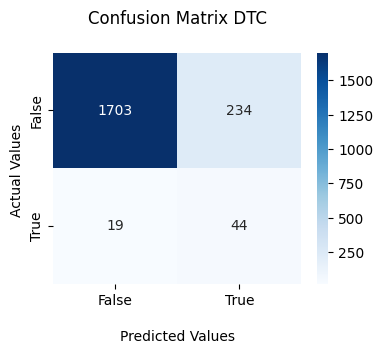

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1937
           1       0.16      0.70      0.26        63

    accuracy                           0.87      2000
   macro avg       0.57      0.79      0.59      2000
weighted avg       0.96      0.87      0.91      2000



In [4]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import accuracy_score

decision_tree = tree.DecisionTreeClassifier(max_depth = 3)
decision_tree.fit(X_train_resample, y_train_resample)

y_pred = decision_tree.predict(X_test)
y_pred_train=decision_tree.predict(X_train_resample)

#confusion matrix
plt.figure(figsize=(4, 3))  # Adjust the size of the figure
ax = sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Blues',fmt='')

ax.set_title('Confusion Matrix DTC\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

print(classification_report(y_test,y_pred))

##### Support Vector Machine 

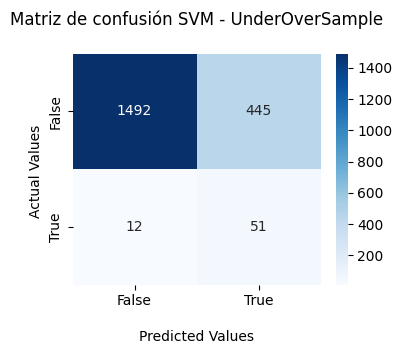

              precision    recall  f1-score   support

           0       0.99      0.77      0.87      1937
           1       0.10      0.81      0.18        63

    accuracy                           0.77      2000
   macro avg       0.55      0.79      0.52      2000
weighted avg       0.96      0.77      0.85      2000



In [5]:
from sklearn.svm import SVC

vector = SVC(kernel='rbf')
vector.fit(X_train_resample,y_train_resample)

y_pred=vector.predict(X_test)
y_pred_train=vector.predict(X_train_resample)


#confusionmatrix
plt.figure(figsize=(4, 3))  # Adjust the size of the figure
ax = sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Blues',fmt='')

ax.set_title('Matriz de confusión SVM - UnderOverSample\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

print(classification_report(y_test,y_pred))

##### KNN-A

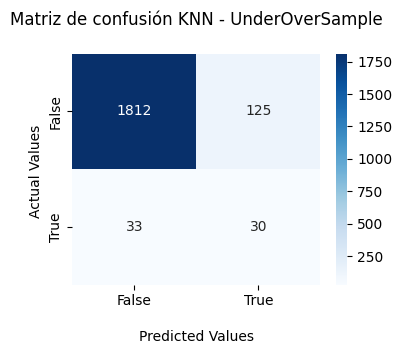

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1937
           1       0.19      0.48      0.28        63

    accuracy                           0.92      2000
   macro avg       0.59      0.71      0.62      2000
weighted avg       0.96      0.92      0.94      2000



In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_resample, y_train_resample)

y_pred = knn.predict(X_test)
y_pred_train = knn.predict(X_train_resample)

#confusion matrix
plt.figure(figsize=(4, 3))  # Adjust the size of the figure
ax = sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Blues',fmt='')

ax.set_title('Matriz de confusión KNN - UnderOverSample\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

print(classification_report(y_test,y_pred))

##### Random Forest

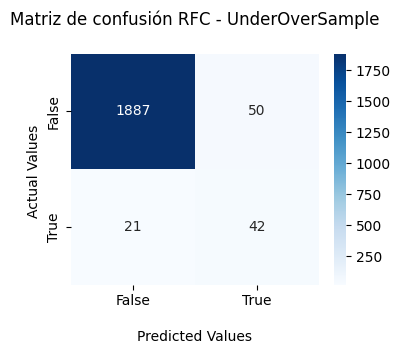

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1937
           1       0.46      0.67      0.54        63

    accuracy                           0.96      2000
   macro avg       0.72      0.82      0.76      2000
weighted avg       0.97      0.96      0.97      2000



In [7]:
from sklearn.ensemble import RandomForestClassifier

Rforest = RandomForestClassifier()
Rforest.fit(X_train_resample, y_train_resample)

y_pred = Rforest.predict(X_test)
y_pred_train = Rforest.predict(X_train_resample)


#confusion matrix
plt.figure(figsize=(4, 3))  # Adjust the size of the figure
ax = sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Blues',fmt='')

ax.set_title('Matriz de confusión RFC - UnderOverSample\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

print(classification_report(y_test,y_pred))